In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp
from scipy.spatial import distance
import pandas as pd
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], np.where(data[:,-1]>0,1,-1)

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

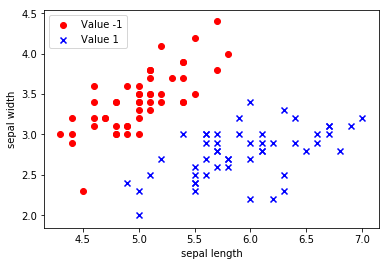

In [6]:
#這邊我們想要畫一個圖來表達類別與特徵之間的關係，因為我們的特徵只取了兩個(pertal length, sepal length)，所以我們可以畫出一個二緯度的散布圖，
#我們可以根據類別種類來畫不同的顏色，例如:類別0畫紅色、類別1畫藍色，這樣的話，就可以看出兩個類別對應兩個特徵的分佈情況。
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='Value -1')
plt.scatter(X[50:, 0], X[50:, 1],color='blue', marker='x', label= 'Value 1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc='upper left')
plt.show()
# 可以看到這兩類(類別0 與 類別1 應該可以用線性模型分得很好)

In [38]:
#Batch Perceptron
import pdb
class Batch_Perceptron():
    '''
    Parameters:
    n_iter: int: 最大的迭代次數，不如預設為(RB)^2
    Attributes:
    w_:1d_array like: weights after fitting
    errors_:list: Number of missclassifications
    '''
    def __init__(self,X,eta=0.1,n_iter='bounded'):
        if n_iter == 'bounded':
            self.n_iter = int(self.iter_bounded(X))
            print(self.n_iter)
        else:
            self.n_iter = n_iter
        self.eta = eta
        self.errors_= []
        
    def fit(self,X,y):
        self.w_ = np.zeros(X.shape[1])
        for _ in range(self.n_iter):
#             pdb.set_trace()
            current_prediction = self.predict(X)
            difference = y - current_prediction
            error = (np.absolute(difference)/2).sum()
            self.errors_.append(error)
            if error == 0:
                break
            for xi, target in zip(X,y):
                if target * self.net_input(xi)<=0:
                    self.w_ += self.eta*target*xi
                    
    def iter_bounded(self,X):
        op = np.array([0,0])
        dist_list = [] 
        for xi in X:
            dist_list.append(distance.euclidean(xi,op))
        max_value = max(dist_list)
        return max_value**4
        
    def net_input(self,X):
        return np.dot(X,self.w_)
    
    def predict(self,X):
        return np.where(self.net_input(X)>0.0,1,-1)

3509


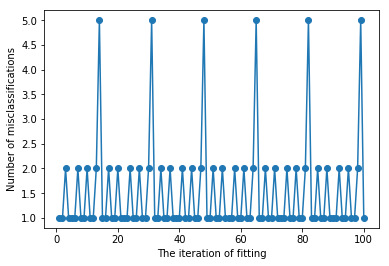

In [37]:
stupid_model = Batch_Perceptron(X)
stupid_model.fit(X, y)
plt.plot(range(1, len(stupid_model.errors_[-100:]) + 1), stupid_model.errors_[-100:],marker='o')
plt.xlabel('The iteration of fitting')
plt.ylabel('Number of misclassifications')
plt.show()

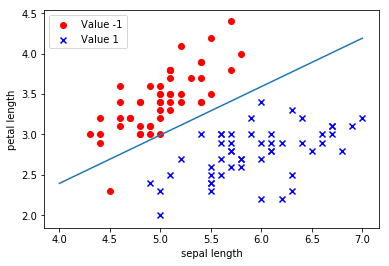

In [39]:
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='Value -1')
plt.scatter(X[50:, 0], X[50:, 1],color='blue', marker='x', label= 'Value 1')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
w = stupid_model.w_
a = -w[0] / w[1]
xx = np.linspace(4, 7)
yy = a * xx 
plt.plot(xx, yy)
plt.show()

In [2]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()



In [3]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [8]:
model.fit(X,y)
preds = model.predict(X)
(preds == y).mean()

1.0